In [31]:
## Import library 
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [32]:
oil_df=pd.read_csv("oil.csv")
hol_df=pd.read_csv("holidays_events.csv")
train_df=pd.read_csv("train.csv")
trans_df=pd.read_csv('transactions.csv')
test_df=pd.read_csv('test.csv')
store_df=pd.read_csv('stores.csv')
sub_df=pd.read_csv("sample_submission.csv")

In [33]:
train_df.head(3)


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0


In [34]:
oil_df.describe() 

,dcoilwtico
count,1175.000000
mean,67.714366
std,25.630476
min,26.190000
25%,46.405000
50%,53.190000
75%,95.660000
max,110.620000


In [35]:
train_df.describe() 

,id,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02


In [36]:
store_df.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [37]:
sub_df.head()

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0


In [38]:
sub_df.describe()

,id,sales
count,2.851200e+04,28512.0
mean,3.015144e+06,0.0
std,8.230850e+03,0.0
min,3.000888e+06,0.0
25%,3.008016e+06,0.0
50%,3.015144e+06,0.0
75%,3.022271e+06,0.0
max,3.029399e+06,0.0


In [39]:
oil_df.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [40]:
oil_df.dtypes


date           object
dcoilwtico    float64
dtype: object

In [41]:
#change date object to type date 

In [42]:
oil_df['date']=pd.to_datetime(oil_df.date)


In [44]:
oil_df.dtypes

date          datetime64[ns]
dcoilwtico           float64
dtype: object

Exploratory Dataset Analysis(EDA)

In [45]:
#add column day month year
# train
train_df['month']=pd.to_datetime(train_df['date']).dt.month
train_df['year']=pd.to_datetime(train_df['date']).dt.year
train_df['day_name']=pd.to_datetime(train_df['date']).dt.day_name()
train_df['day']=pd.to_datetime(train_df['date']).dt.day

#test
test_df['month']=pd.to_datetime(test_df['date']).dt.month
test_df['year']=pd.to_datetime(test_df['date']).dt.year
test_df['day_name']=pd.to_datetime(test_df['date']).dt.day_name()
test_df['day']=pd.to_datetime(test_df['date']).dt.day

In [46]:
print(train_df.head(2)) ; 
print(test_df.head(2)) ; 

   id        date  store_nbr      family  sales  onpromotion  month  year  \
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0      1  2013   
1   1  2013-01-01          1   BABY CARE    0.0            0      1  2013   

  day_name  day  
0  Tuesday    1  
1  Tuesday    1  
        id        date  store_nbr      family  onpromotion  month  year  \
0  3000888  2017-08-16          1  AUTOMOTIVE            0      8  2017   
1  3000889  2017-08-16          1   BABY CARE            0      8  2017   

    day_name  day  
0  Wednesday   16  
1  Wednesday   16  


In [130]:
##oil_df['month']=oil_df.date.dt.month
##oil_df['year']=oil_df.date.dt.year
##oil_df['day']=oil_df.date.dt.day_name()
##oil_df['day_date']=oil_df.date.dt.day

# List of columns to delete
columns_to_delete = ['month', 'year', 'day', 'day_date']

# Drop the specified columns
oil_df = oil_df.drop(columns=columns_to_delete)


In [131]:
oil_df.head()



,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


Exploratory Dataset Analysis(EDA)

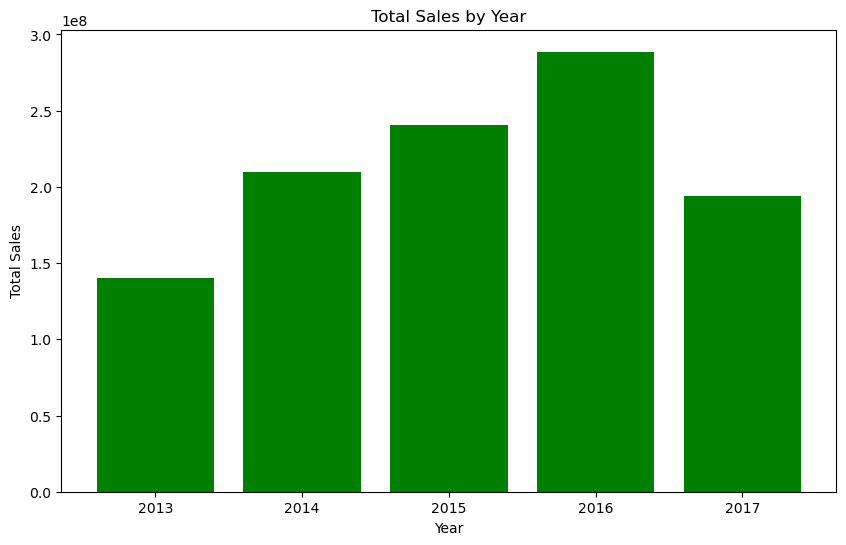

In [49]:

# Assuming your sales column is named 'sales'
# Replace 'sales' with the actual column name if it's different
sales_by_year = train_df.groupby('year')['sales'].sum()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(sales_by_year.index, sales_by_year.values, color='green')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Year')
plt.show()


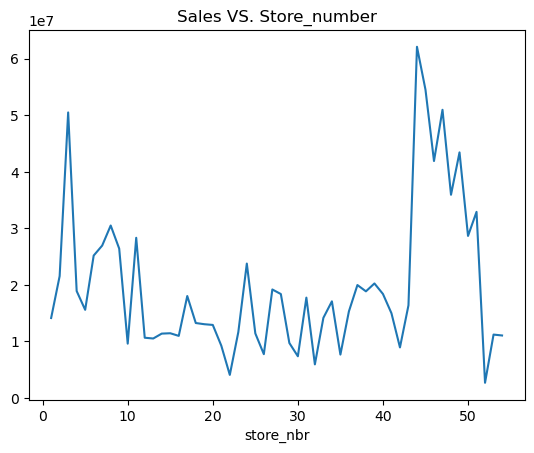

In [50]:
#Store_number VS Sales 
train_df.groupby('store_nbr').sales.sum().sort_index().plot();
plt.title("Sales VS. Store_number");

In [51]:
train_df.head()

,id,date,store_nbr,family,sales,onpromotion,month,year,day_name,day
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,1,2013,Tuesday,1
1,1,2013-01-01,1,BABY CARE,0.0,0,1,2013,Tuesday,1
2,2,2013-01-01,1,BEAUTY,0.0,0,1,2013,Tuesday,1
3,3,2013-01-01,1,BEVERAGES,0.0,0,1,2013,Tuesday,1
4,4,2013-01-01,1,BOOKS,0.0,0,1,2013,Tuesday,1


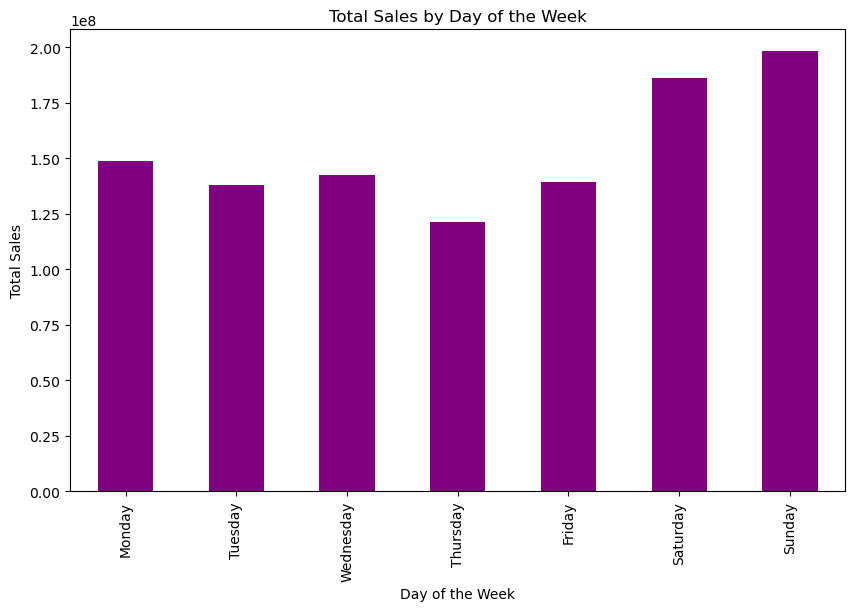

In [52]:
# COMPARE DAY_NAME VS SALES 
# Assuming your sales column is named 'sales' and day name column is named 'day_name'
# Replace 'sales' and 'day_name' with the actual column names if they are different

# Group by day name and calculate the total sales for each day
sales_by_day = train_df.groupby('day_name')['sales'].sum()

# Reorder the days of the week for proper plotting
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_day = sales_by_day.reindex(days_order)

# Plotting
plt.figure(figsize=(10, 6))
sales_by_day.plot(kind='bar', color='purple')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.title('Total Sales by Day of the Week')
plt.show()


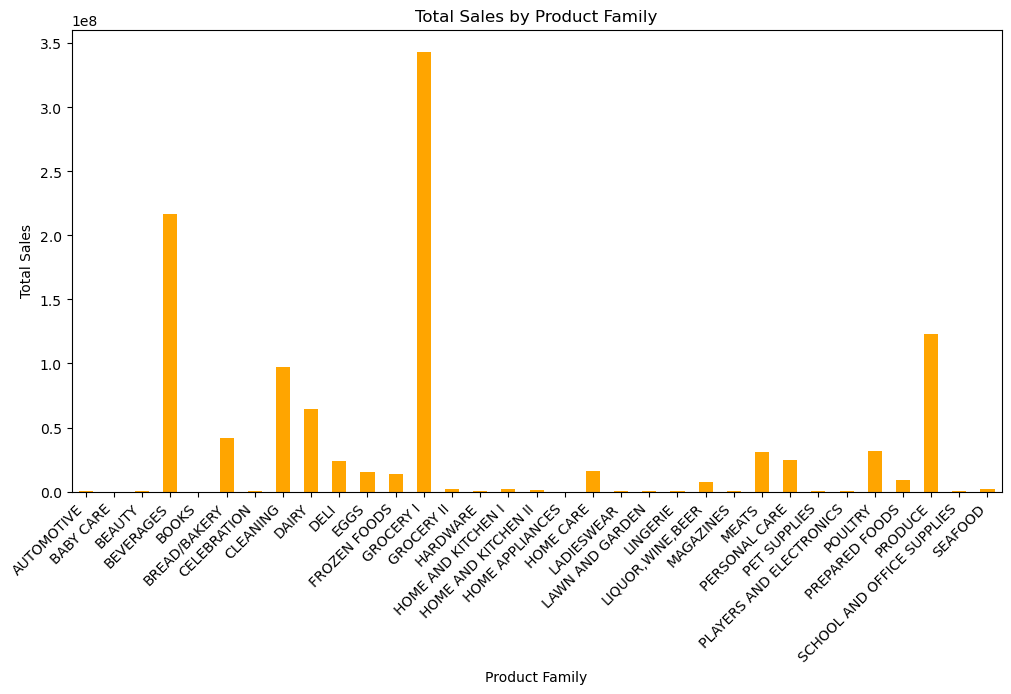

In [53]:
sales_by_family = train_df.groupby('family')['sales'].sum()

# Plotting
plt.figure(figsize=(12, 6))
sales_by_family.plot(kind='bar', color='orange')
plt.xlabel('Product Family')
plt.ylabel('Total Sales')
plt.title('Total Sales by Product Family')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

# Maybe we can use this one for association rule 

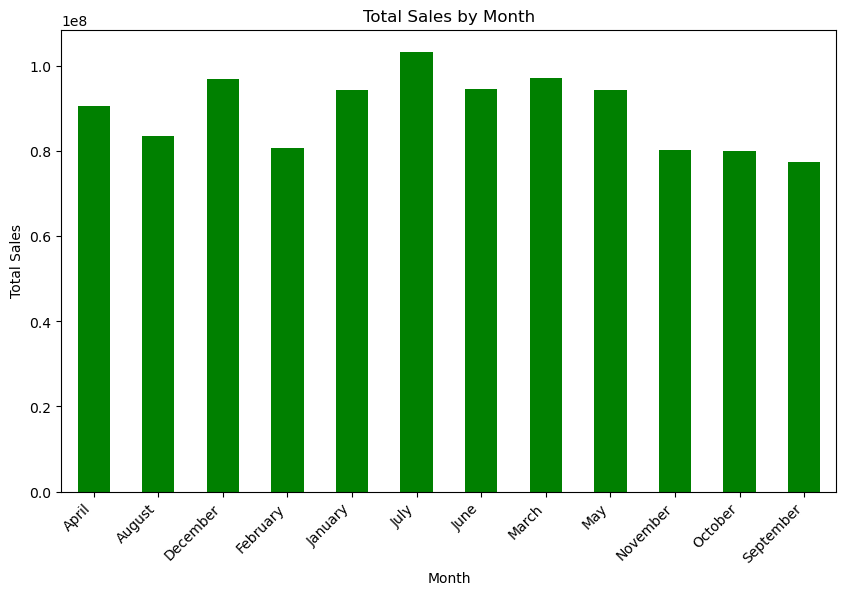

In [54]:


# Assuming your sales column is named 'sales' and month column is named 'month'
# Replace 'sales' and 'month' with the actual column names if they are different

# Map numerical month values to their string names
month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Apply the mapping to the 'month' column
train_df['month_name'] = train_df['month'].map(month_names)

# Group by month name and calculate the total sales for each month
sales_by_month = train_df.groupby('month_name')['sales'].sum()

# Plotting
plt.figure(figsize=(10, 6))
sales_by_month.plot(kind='bar', color='green')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales by Month')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()




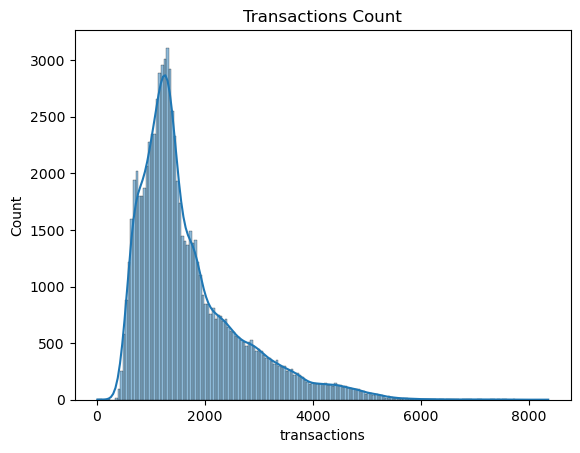

In [55]:
sns.histplot(data=trans_df,x='transactions',kde=True)
plt.title("Transactions Count")
plt.show()


Compare with oil

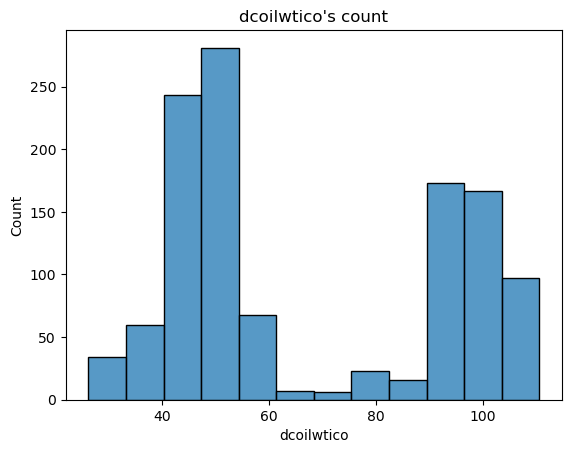

In [56]:
sns.histplot(data=oil_df,x='dcoilwtico')
plt.title("dcoilwtico's count")
plt.show()

In [133]:
oil_df.describe()

,dcoilwtico
count,1175.000000
mean,67.714366
std,25.630476
min,26.190000
25%,46.405000
50%,53.190000
75%,95.660000
max,110.620000


In [132]:
oil_df.dtypes

date           object
dcoilwtico    float64
dtype: object

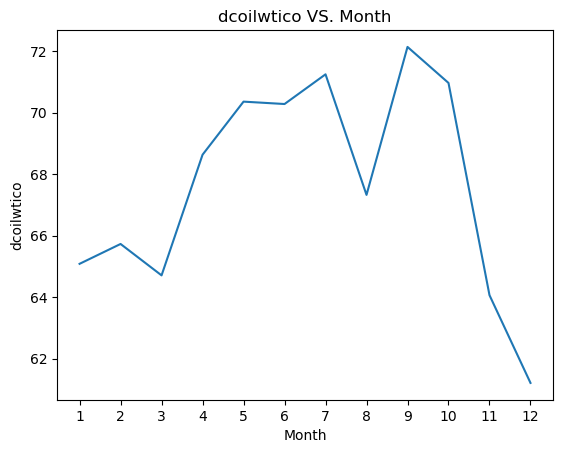

In [59]:
oil_df.groupby('month').dcoilwtico.mean().sort_index().plot()
plt.xticks(range(1,13))
plt.xlabel("Month")
plt.ylabel('dcoilwtico')
plt.title("dcoilwtico VS. Month")
plt.show()

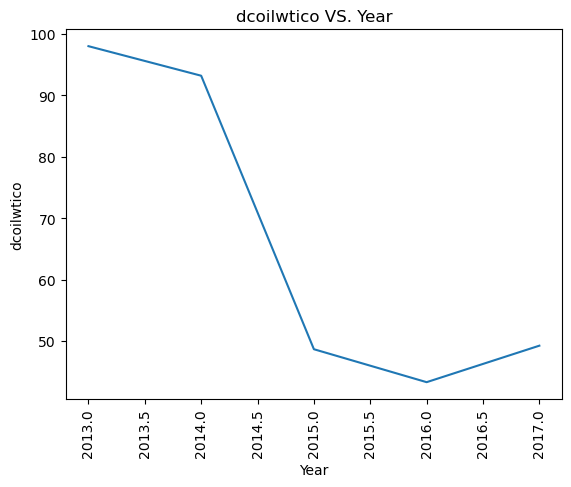

In [60]:
oil_df.groupby('year').dcoilwtico.mean().sort_index().plot()
plt.xticks(rotation=90)
plt.xlabel("Year")
plt.ylabel('dcoilwtico')
plt.title("dcoilwtico VS. Year")
plt.show()

Train Engineering 

In [61]:
train_df.head(2)

,id,date,store_nbr,family,sales,onpromotion,month,year,day_name,day,month_name
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,1,2013,Tuesday,1,January
1,1,2013-01-01,1,BABY CARE,0.0,0,1,2013,Tuesday,1,January


In [62]:
store_df.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [63]:
### Maybe we can add the oil table too 

In [136]:
#combined two of them from store_nbr 
merged_df=train_df.merge(store_df,on='store_nbr')
test_df=test_df.merge(store_df,on='store_nbr')

In [65]:
test_df.head() 

,id,date,store_nbr,family,onpromotion,month,year,day_name,day,city,state,type,cluster
0,3000888,2017-08-16,1,AUTOMOTIVE,0,8,2017,Wednesday,16,Quito,Pichincha,D,13
1,3000889,2017-08-16,1,BABY CARE,0,8,2017,Wednesday,16,Quito,Pichincha,D,13
2,3000890,2017-08-16,1,BEAUTY,2,8,2017,Wednesday,16,Quito,Pichincha,D,13
3,3000891,2017-08-16,1,BEVERAGES,20,8,2017,Wednesday,16,Quito,Pichincha,D,13
4,3000892,2017-08-16,1,BOOKS,0,8,2017,Wednesday,16,Quito,Pichincha,D,13


In [139]:
## we merged data trian with an oil come together
merged_df.columns
merged_df = pd.merge(merged_df, oil_df, on='date', how='left')



In [142]:
merged_df.tail() 

,id,date,store_nbr,family,sales,onpromotion,month,year,day_name,day,month_name,city,state,type,cluster,dcoilwtico
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,8,2017,Tuesday,15,August,Quito,Pichincha,B,6,47.57
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,8,2017,Tuesday,15,August,Quito,Pichincha,B,6,47.57
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,8,2017,Tuesday,15,August,Quito,Pichincha,B,6,47.57
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,8,2017,Tuesday,15,August,Quito,Pichincha,B,6,47.57
3000887,3000887,2017-08-15,9,SEAFOOD,16.000,0,8,2017,Tuesday,15,August,Quito,Pichincha,B,6,47.57


In [68]:
# for all input will test on target which is sales
input_cols=['id','store_nbr','family','onpromotion','month','year','day_name','city','state']
target_col=['sales']


In [69]:
merged_df.shape

(3000888, 15)

In [70]:
sample_df=merged_df.sample(frac=0.1).copy()
sample_df.shape

(300089, 15)

In [71]:
# Train
inputs=merged_df[input_cols].copy()
target=merged_df[target_col].copy()

# Sample 
inputs_sample=sample_df[input_cols].copy()
target_sample=sample_df[target_col].copy()

# Test
test_inputs=test_df[input_cols].copy()

Let select the Numeric and Categorical columns 


In [72]:
numeric_cols=inputs.select_dtypes(np.number).columns.tolist()
categorical_cols=inputs.select_dtypes('O').columns.tolist()

In [73]:
len(numeric_cols),len(categorical_cols)


(5, 4)

In [74]:
inputs.shape

(3000888, 9)

In [75]:
print(numeric_cols) 
print(categorical_cols)
print(merged_df.describe)

['id', 'store_nbr', 'onpromotion', 'month', 'year']
['family', 'day_name', 'city', 'state']
<bound method NDFrame.describe of               id        date  store_nbr                      family     sales  \
0              0  2013-01-01          1                  AUTOMOTIVE     0.000   
1              1  2013-01-01          1                   BABY CARE     0.000   
2              2  2013-01-01          1                      BEAUTY     0.000   
3              3  2013-01-01          1                   BEVERAGES     0.000   
4              4  2013-01-01          1                       BOOKS     0.000   
...          ...         ...        ...                         ...       ...   
3000883  3000883  2017-08-15          9                     POULTRY   438.133   
3000884  3000884  2017-08-15          9              PREPARED FOODS   154.553   
3000885  3000885  2017-08-15          9                     PRODUCE  2419.729   
3000886  3000886  2017-08-15          9  SCHOOL AND OFFICE SUPPL

In [76]:
##Scaling numerical columns
from sklearn.preprocessing import StandardScaler


In [77]:
scaler=StandardScaler()
scaler.fit(merged_df[numeric_cols])

StandardScaler()

In [78]:
# Original Dataset
inputs[numeric_cols]=scaler.transform(inputs[numeric_cols])
test_inputs[numeric_cols]=scaler.transform(test_inputs[numeric_cols])

# Sample Dataset
inputs_sample[numeric_cols]=scaler.transform(inputs_sample[numeric_cols])

##Encoder for Categorical Columns.¶


In [79]:
from sklearn.preprocessing import OneHotEncoder


In [80]:
encoder=OneHotEncoder(sparse_output=False,handle_unknown='ignore')
encoder.fit(merged_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [81]:
encoded_cols=list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['family_AUTOMOTIVE', 'family_BABY CARE', 'family_BEAUTY', 'family_BEVERAGES', 'family_BOOKS', 'family_BREAD/BAKERY', 'family_CELEBRATION', 'family_CLEANING', 'family_DAIRY', 'family_DELI', 'family_EGGS', 'family_FROZEN FOODS', 'family_GROCERY I', 'family_GROCERY II', 'family_HARDWARE', 'family_HOME AND KITCHEN I', 'family_HOME AND KITCHEN II', 'family_HOME APPLIANCES', 'family_HOME CARE', 'family_LADIESWEAR', 'family_LAWN AND GARDEN', 'family_LINGERIE', 'family_LIQUOR,WINE,BEER', 'family_MAGAZINES', 'family_MEATS', 'family_PERSONAL CARE', 'family_PET SUPPLIES', 'family_PLAYERS AND ELECTRONICS', 'family_POULTRY', 'family_PREPARED FOODS', 'family_PRODUCE', 'family_SCHOOL AND OFFICE SUPPLIES', 'family_SEAFOOD', 'day_name_Friday', 'day_name_Monday', 'day_name_Saturday', 'day_name_Sunday', 'day_name_Thursday', 'day_name_Tuesday', 'day_name_Wednesday', 'city_Ambato', 'city_Babahoyo', 'city_Cayambe', 'city_Cuenca', 'city_Daule', 'city_El Carmen', 'city_Esmeraldas', 'city_Guaranda', 'city_Gua

In [82]:
# Original Dataset
inputs[encoded_cols]=encoder.transform(inputs[categorical_cols])
test_inputs[encoded_cols]=encoder.transform(test_inputs[categorical_cols])

# Sample Dataset
inputs_sample[encoded_cols]=encoder.transform(inputs_sample[categorical_cols])

In [83]:
inputs.shape,test_inputs.shape


((3000888, 87), (28512, 87))

In [84]:
X=inputs[numeric_cols+encoded_cols]
X_test=test_inputs[numeric_cols+encoded_cols]

# Sample Dataset
X_sample=inputs_sample[numeric_cols+encoded_cols]

## Time to do Modeling

In [85]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1=train_test_split(X_sample,target_sample,test_size=0.3,random_state=42)

In [86]:
X_train1.shape,y_train1.shape

((210062, 83), (210062, 1))

## Desicion tree regressor

In [149]:
test_df.shape , prediction_test.shape

((28512, 17), (90027,))

In [154]:
## testing desicion tree score
from sklearn.tree import  DecisionTreeRegressor
tree= DecisionTreeRegressor().fit(X_train1,y_train1)

prediction_test = tree.predict(X_test1) 

result_df = pd.DataFrame({ 'id':X_test1['id'] , 'sales' : prediction_test })

result_df['id'] = result_df['id'].astype(int)


result_df.to_csv('Sale_prediction2.csv', index = False)

tree.score(X_test1,y_test1)

0.8804363192710498

In [153]:
# Check for non-integer values in 'id' column
non_integer_values = result_df[~result_df['id'].astype(str).str.isdigit()]['id']

# If there are non-integer values, inspect or clean the 'id' column
print(non_integer_values)


905328    -0.723471
2077164   -0.422332
1280219   -1.603616
1162840    1.471588
1024091   -0.248217
             ...   
1923062    0.363363
2169260   -1.609192
405944    -0.676495
2330309    1.501181
1008354   -1.229433
Name: id, Length: 90027, dtype: float64


## Model Evaluation

In [88]:
## crate validation set from training set 
## This line of code is using the train_test_split function from scikit-learn to split your dataset into training and validation sets. from test size 
X_train,X_val,X_target,val_target=train_test_split(X_sample,target_sample,random_state=42,test_size=0.3)


In [89]:
X_train.shape, X_val.shape, X_val.shape,val_target.shape

((210062, 83), (90027, 83), (90027, 83), (90027, 1))

## Do the RMS Error to measure predict and actual value

In [90]:
from sklearn.metrics import mean_squared_error 
def rms(truth,pred):
    return mean_squared_error(truth,pred)

In [91]:
rms(X_target,tree.predict(X_train))


0.0

In [92]:
rms(val_target,tree.predict(X_val))


139561.1148435524

## Hyperparamenter tuning

In [93]:
def hyper_tuning(**parms):
    model=DecisionTreeRegressor(**parms)
    model.fit(X_train,X_target)
    train_error=1-model.score(X_train,X_target)
    val_error=1-model.score(X_val,val_target)
    train_rms=rms(X_target,model.predict(X_train))
    val_rms=rms(val_target,model.predict(X_val))
    return {'train_error':train_error,'val_error':val_error,'rms_train_error':train_rms,'rms_val_error':val_rms}

In [94]:
hyper_tuning(max_depth=2)


{'train_error': 0.5482142326041273,
 'val_error': 0.5309507662430238,
 'rms_train_error': 675498.124844228,
 'rms_val_error': 634903.0811126482}

In [95]:
max_depth_df=pd.DataFrame([hyper_tuning(max_depth=i) for i in range(1,20)])
max_depth_df.head()

,train_error,val_error,rms_train_error,rms_val_error
0,0.710211,0.699995,875106.735772,837043.215410
1,0.548214,0.530951,675498.124844,634903.081113
2,0.443140,0.431317,546027.701670,515762.370565
3,0.358580,0.341704,441834.775337,408604.291857
4,0.288918,0.279490,355998.602436,334210.292001


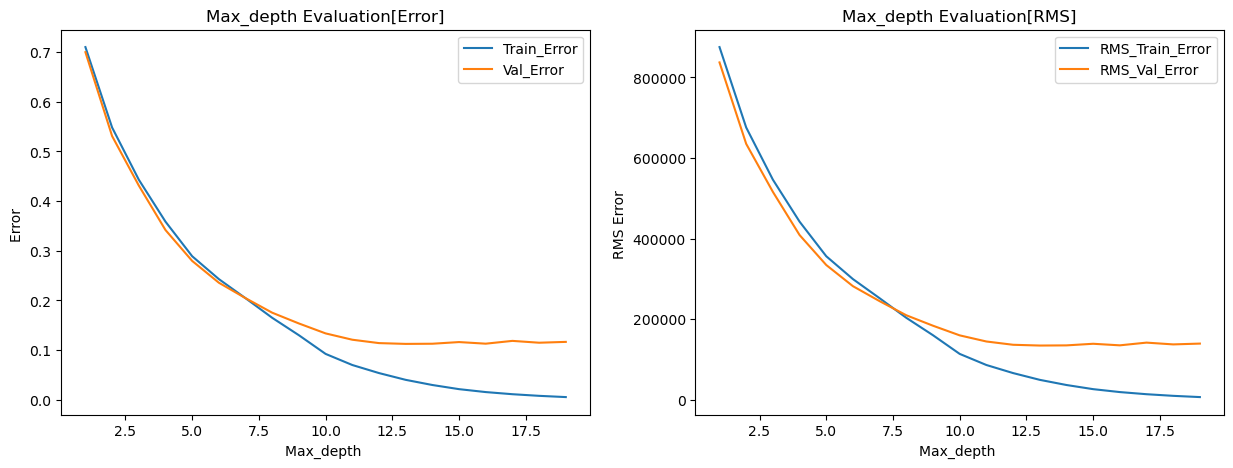

In [96]:
fig,axes=plt.subplots(1,2,figsize=(15,5))

# Error
axes[0].set_title("Max_depth Evaluation[Error]")
axes[0].set_xlabel("Max_depth ")
axes[0].set_ylabel("Error ")

axes[0].plot(range(1,20),max_depth_df['train_error'],label='Train_Error')
axes[0].plot(range(1,20),max_depth_df['val_error'],label='Val_Error')
axes[0].legend()

# RMSE Error
axes[1].set_title("Max_depth Evaluation[RMS]")
axes[1].set_xlabel("Max_depth ")
axes[1].set_ylabel("RMS Error ")

axes[1].plot(range(1,20),max_depth_df['rms_train_error'],label='RMS_Train_Error')
axes[1].plot(range(1,20),max_depth_df['rms_val_error'],label='RMS_Val_Error')
axes[1].legend()


plt.show()


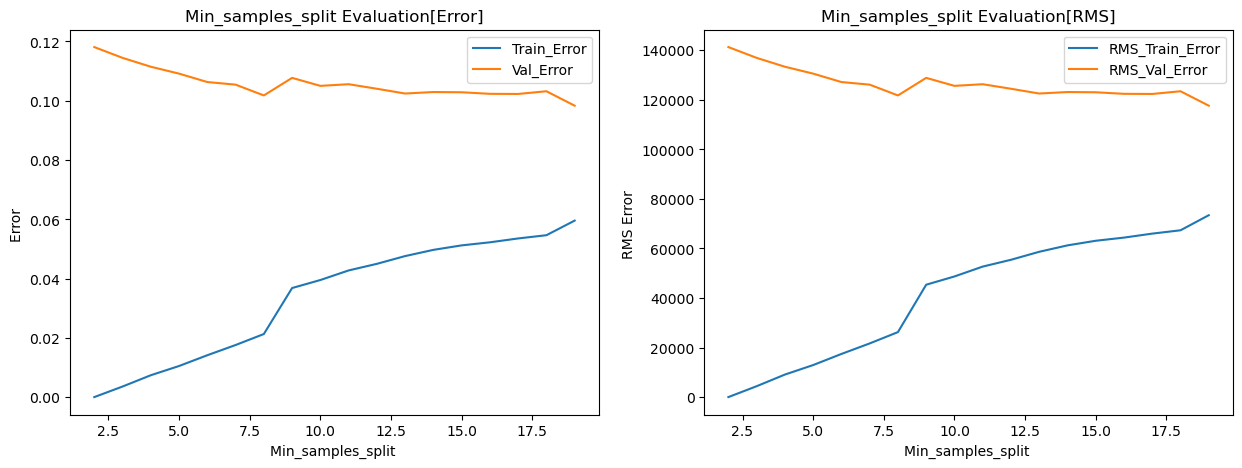

In [97]:
Min_samples_split_df=pd.DataFrame([hyper_tuning(min_samples_split=i) for i in range(2,20)])

# Forming 2 Graph layout.
fig,axes=plt.subplots(1,2,figsize=(15,5))

# Error
axes[0].set_title("Min_samples_split Evaluation[Error]")
axes[0].set_xlabel("Min_samples_split ")
axes[0].set_ylabel("Error ")

axes[0].plot(range(2,20),Min_samples_split_df['train_error'],label='Train_Error')
axes[0].plot(range(2,20),Min_samples_split_df['val_error'],label='Val_Error')
axes[0].legend()

# RMSE Error
axes[1].set_title("Min_samples_split Evaluation[RMS]")
axes[1].set_xlabel("Min_samples_split ")
axes[1].set_ylabel("RMS Error ")

axes[1].plot(range(2,20),Min_samples_split_df['rms_train_error'],label='RMS_Train_Error')
axes[1].plot(range(2,20),Min_samples_split_df['rms_val_error'],label='RMS_Val_Error')
axes[1].legend()


plt.show()

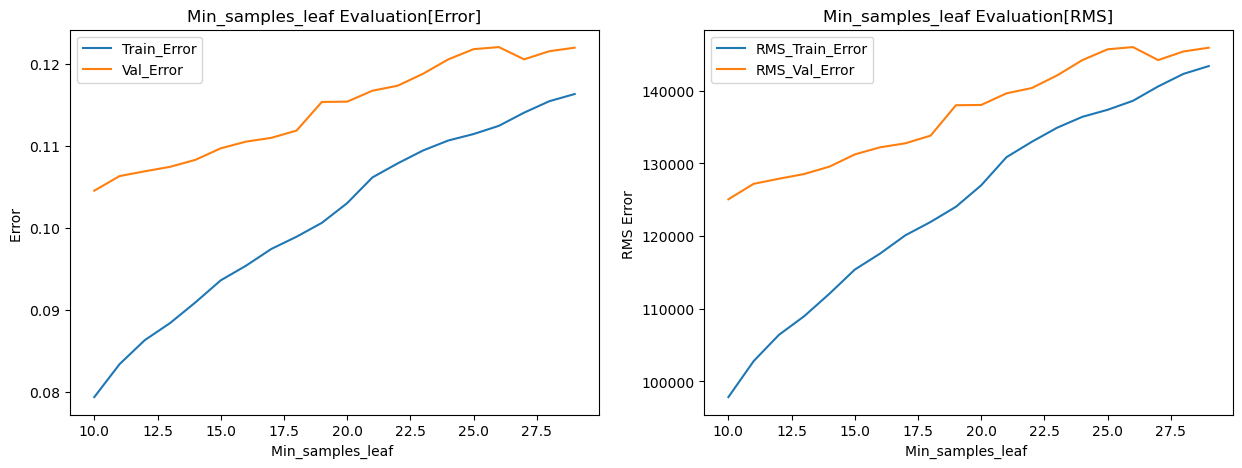

In [105]:
Min_samples_leaf_df=pd.DataFrame([hyper_tuning(min_samples_leaf=i) for i in range(10,30)])

# Forming 2 Graph layout.
fig,axes=plt.subplots(1,2,figsize=(15,5))

# Error
axes[0].set_title("Min_samples_leaf Evaluation[Error]")
axes[0].set_xlabel("Min_samples_leaf ")
axes[0].set_ylabel("Error ")

axes[0].plot(range(10,30),Min_samples_leaf_df['train_error'],label='Train_Error')
axes[0].plot(range(10,30),Min_samples_leaf_df['val_error'],label='Val_Error')
axes[0].legend()

# RMSE Error
axes[1].set_title("Min_samples_leaf Evaluation[RMS]")
axes[1].set_xlabel("Min_samples_leaf ")
axes[1].set_ylabel("RMS Error ")

axes[1].plot(range(10,30),Min_samples_leaf_df['rms_train_error'],label='RMS_Train_Error')
axes[1].plot(range(10,30),Min_samples_leaf_df['rms_val_error'],label='RMS_Val_Error')
axes[1].legend()


plt.show()

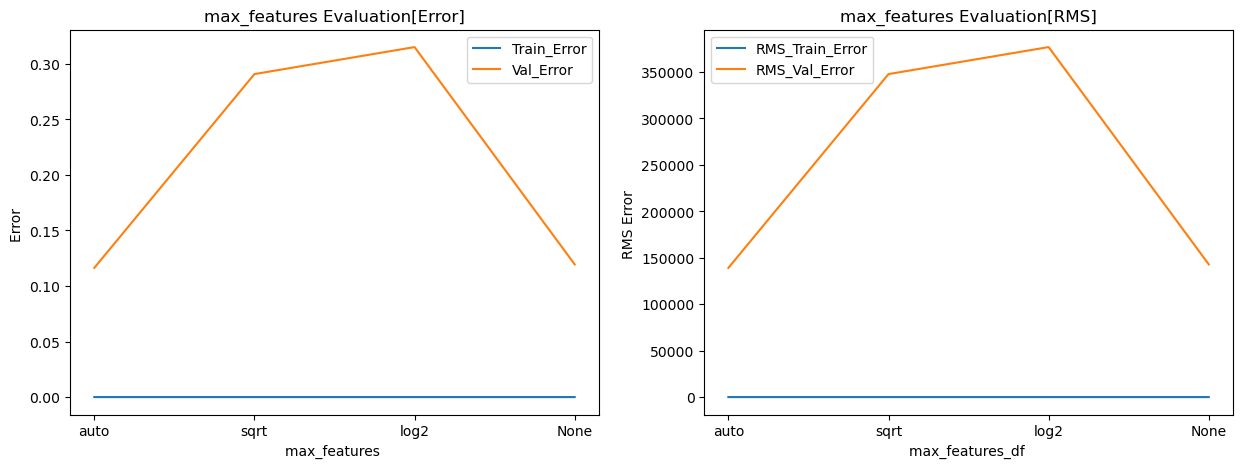

In [106]:
# Forming DataFrame
max_features_df=pd.DataFrame([hyper_tuning(max_features=i) for i in ['auto', 'sqrt', 'log2',None]])

# Forming 2 Graph layout.
fig,axes=plt.subplots(1,2,figsize=(15,5))

# Error
axes[0].set_title("max_features Evaluation[Error]")
axes[0].set_xlabel("max_features ")
axes[0].set_ylabel("Error ")

axes[0].plot([1,2,3,4],max_features_df['train_error'],label='Train_Error')
axes[0].plot([1,2,3,4],max_features_df['val_error'],label='Val_Error')
axes[0].legend()
axes[0].set_xticks([1,2,3,4],['auto', 'sqrt', 'log2','None'])

# RMSE Error
axes[1].set_title("max_features Evaluation[RMS]")
axes[1].set_xlabel("max_features_df ")
axes[1].set_ylabel("RMS Error ")

axes[1].plot([1,2,3,4],max_features_df['rms_train_error'],label='RMS_Train_Error')
axes[1].plot([1,2,3,4],max_features_df['rms_val_error'],label='RMS_Val_Error')
axes[1].legend()
axes[1].set_xticks([1,2,3,4],['auto', 'sqrt', 'log2','None'])

plt.show()


In [107]:
tree= DecisionTreeRegressor(max_depth=7,min_samples_split=11,min_samples_leaf=26,max_features='auto')
tree.fit(X,target)


DecisionTreeRegressor(max_depth=7, max_features='auto', min_samples_leaf=26,
                      min_samples_split=11)

In [108]:
preds=tree.predict(X_test)
preds

array([  52.0774031 ,   52.0774031 ,  225.62603662, ..., 1149.02458649,
        225.62603662,   52.0774031 ])

In [109]:
sub_df.head()


,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0


In [110]:
sub_df['sales']=preds
sub_df.head()

,id,sales
0,3000888,52.077403
1,3000889,52.077403
2,3000890,225.626037
3,3000891,3931.285937
4,3000892,52.077403


In [112]:
sub_df.to_csv("submissiontest.csv",index=False)
